<a href="https://colab.research.google.com/github/leobezlel/excelr-assignments/blob/main/Assignment_14(XGBM_%26_LGBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

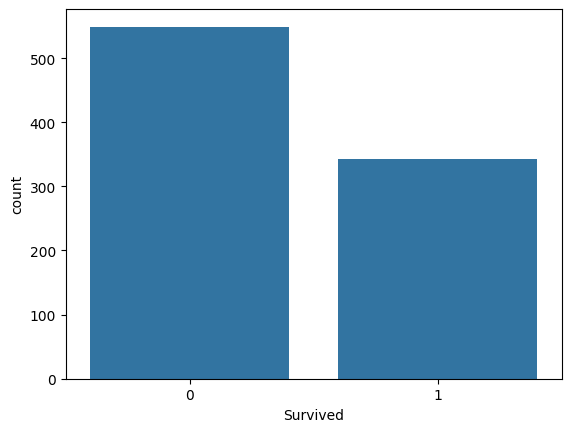

In [ ]:
sns.countplot(x= train['Survived']) #Survival rate

<Axes: xlabel='Sex', ylabel='count'>

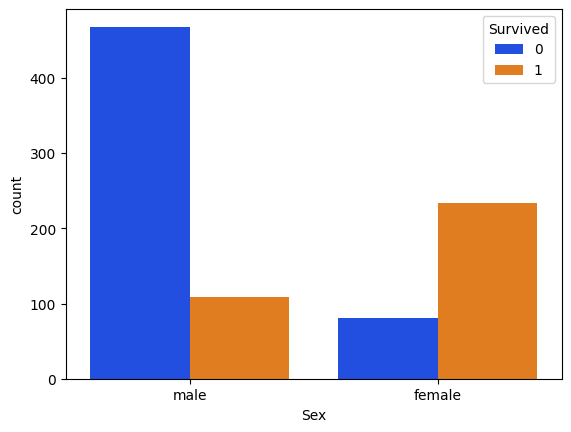

In [ ]:
sns.countplot(x='Sex', hue= 'Survived', data=train, palette = 'bright')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

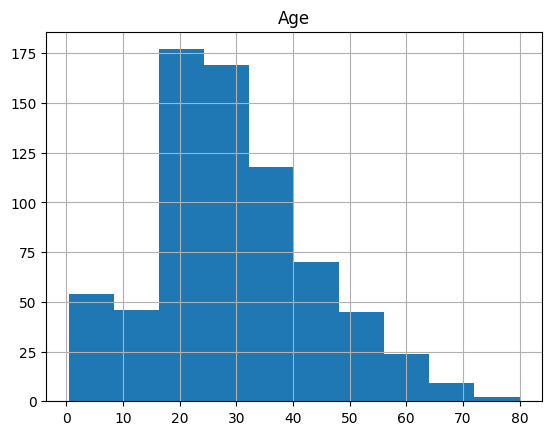

In [ ]:
train.hist('Age')

<Axes: ylabel='Frequency'>

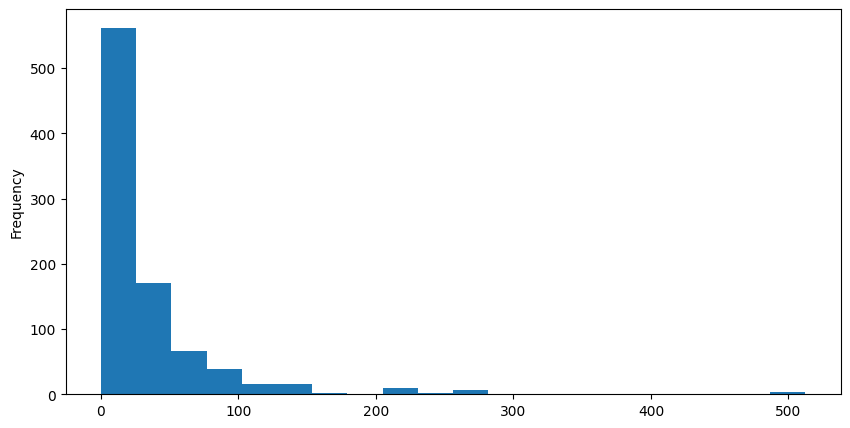

In [ ]:
train['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='count', ylabel='SibSp'>

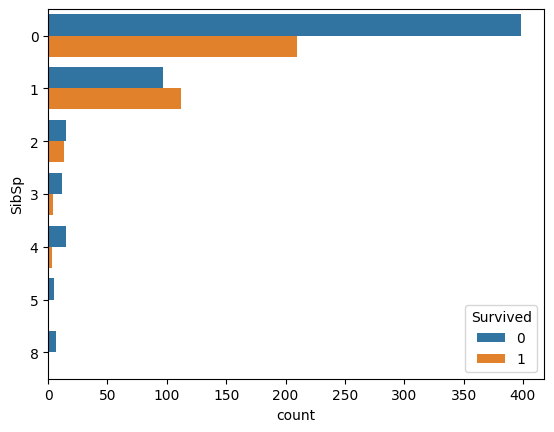

In [ ]:
sns.countplot(y='SibSp', hue = "Survived", data=train)

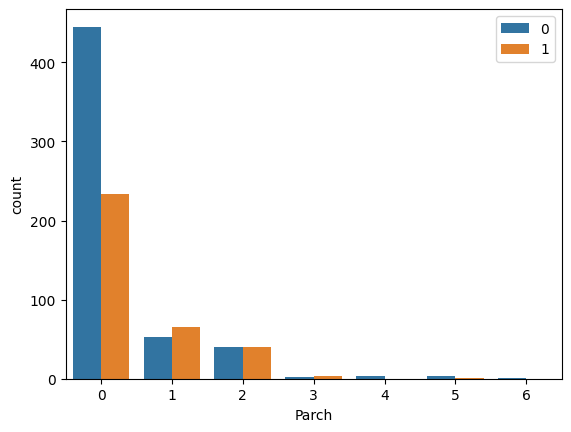

In [ ]:
sns.countplot(x='Parch', hue = "Survived", data=train)
plt.legend(loc = 'upper right')

<Axes: xlabel='Pclass', ylabel='Age'>

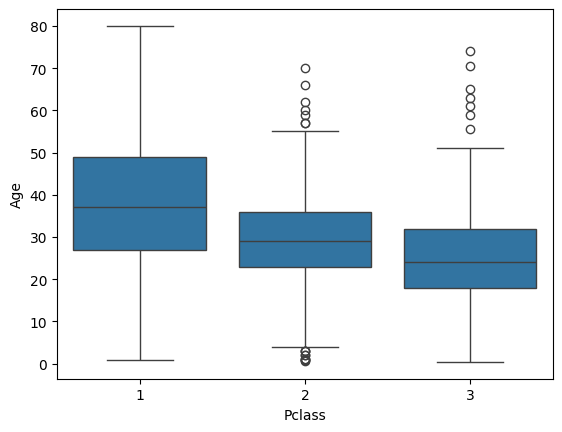

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
target = train['Survived']

In [ ]:
data = pd.concat([train, test])
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
target = pd.DataFrame(target)
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


In [ ]:
data.drop(['Age', 'Cabin'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,2


In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [ ]:
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

<ipython-input-26-e1a5f729700d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Embarked'] = data['Embarked'].fillna(method = 'ffill')


In [ ]:
data.isnull().sum() #all the missing values have been catered for through data munging

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
embarked_dummies = pd.get_dummies(data.Embarked)
data = pd.concat([data,embarked_dummies], axis=1)
data = data.drop("Embarked", axis=1)

sex_dummies= pd.get_dummies(data.Sex)
data = pd.concat([data,sex_dummies], axis=1)
data = data.drop("Sex", axis=1)

In [ ]:
(data.shape) #train and train data shape

(1309, 9)

In [ ]:
new_train_data = data.iloc[:891,]
new_train_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,False,False,True,False,True
1,1,1,0,71.2833,True,False,False,True,False
2,3,0,0,7.9250,False,False,True,True,False
3,1,1,0,53.1000,False,False,True,True,False
4,3,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,False,False,True,False,True
887,1,0,0,30.0000,False,False,True,True,False
888,3,1,2,23.4500,False,False,True,True,False
889,1,0,0,30.0000,True,False,False,False,True


In [ ]:
new_test_data = data.iloc[891:,]
new_test_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,0,0,7.8292,False,True,False,False,True
1,3,1,0,7.0000,False,False,True,True,False
2,2,0,0,9.6875,False,True,False,False,True
3,3,0,0,8.6625,False,False,True,False,True
4,3,1,1,12.2875,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,False,False,True,False,True
414,1,0,0,108.9000,True,False,False,True,False
415,3,0,0,7.2500,False,False,True,False,True
416,3,0,0,8.0500,False,False,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_train_data, target, random_state=11,test_size = 0.3)

In [ ]:
# Perform xgboost method
import xgboost as xgb

# Setting hyperparameters
dtrain = xgb.DMatrix(x_train, label=y_train)

# Set hyperparameters
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

In [ ]:
# Training model with cross validation

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics=['error'],
    early_stopping_rounds=10,
    stratified=True,
    seed=42
)

best_iteration = cv_results['test-error-mean'].idxmin()
best_error = cv_results.loc[best_iteration, 'test-error-mean']

print(f"Best error rate: {best_error:.4f} (iteration: {best_iteration+1})")

Best error rate: 0.1959 (iteration: 44)


In [ ]:
# Making predictions on test data and evaluate results
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


dtest = xgb.DMatrix(x_test)

best_model = xgb.train(params, dtrain, num_boost_round=best_iteration+1)

predictions = best_model.predict(dtest)
predictions = [round(value) for value in predictions]

accuracy = accuracy_score(y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.8171641791044776


In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

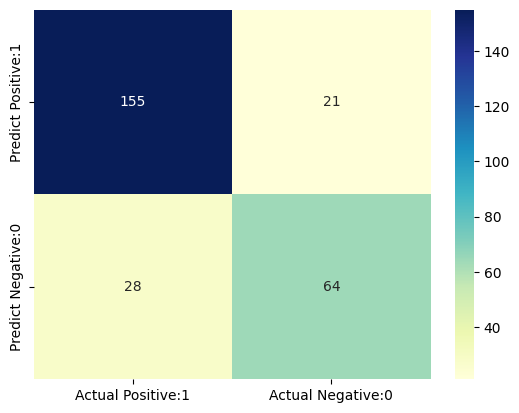

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 250, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401284 -> initscore=-0.400118
[LightGBM] [Info] Start training from score -0.400118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8172


XGBoost (Extreme Gradient Boosting) and LightGBM (Light Gradient Boosting Machine) are both popular gradient boosting frameworks known for their efficiency and performance in machine learning tasks, particularly in the realm of structured/tabular data. Here are some key strengths and weaknesses of each:

XGBoost:

Strengths:

Performance: XGBoost is known for its high performance and speed. It implements parallel processing and tree pruning techniques to improve efficiency. Regularization: It includes regularization techniques like L1 and L2 regularization to prevent overfitting. Flexibility: It supports various objective functions, including regression, classification, and ranking, making it versatile for different types of problems. Tree Pruning: XGBoost prunes trees using a depth-first approach, which can lead to better performance and less overfitting. Handling Missing Values: It has built-in capabilities to handle missing values in the data.

Weaknesses:

Scalability: While XGBoost is generally fast and efficient, it may not scale as well to extremely large datasets as some other methods. Memory Usage: Due to its design, XGBoost can consume more memory compared to other algorithms, especially when dealing with deep trees.

LightGBM:

Strengths:

Speed: LightGBM is known for its speed and efficiency, especially on large datasets. It uses a histogram-based algorithm for splitting, which reduces computation. Memory Efficiency: LightGBM uses a leaf-wise growth strategy, which can lead to lower memory usage compared to XGBoost, especially for large datasets. Scalability: It can handle large datasets efficiently and is designed to scale well with increasing data sizes. Feature Importance: LightGBM provides built-in feature importance scores, making it easier to interpret the model.

Weaknesses:

Sensitivity to Parameters: LightGBM's performance can be sensitive to its hyperparameters, and tuning them effectively can be challenging. Less Mature: LightGBM is relatively newer compared to XGBoost and may have fewer resources and community support.